In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
#Функции
#Функция получения подробной информации о каждом столбце
def get_unique_and_isnull(df):
    for col in list(df.columns):
        print(col)
        print(df[col].unique())
        print(df[col].value_counts())
        print('Пустых значений:')
        print(df[col].isnull().sum())
        print('Уникальных значений:')
        print(df[col].nunique())
        print()

#Функция построения графиков boxplot по списку
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (12, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:5])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
#Функция нахождения значимых параметров с использованием теста Стьюдента
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [5]:
students = pd.read_csv('stud_math.xls')
students.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     NaN       A   4.0   4.0   at_home   teacher   
1       GP   F   17       U     GT3     NaN   1.0   1.0   at_home     other   
2       GP   F   15       U     LE3       T   1.0   1.0   at_home     other   
3       GP   F   15       U     GT3       T   4.0   2.0    health       NaN   
4       GP   F   16       U     GT3       T   3.0   3.0     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A   2.0   2.0  services  services   
391     MS   M   17       U     LE3       T   3.0   1.0  services  services   
392     MS   M   21       R     GT3       T   1.0   1.0     other     other   
393     MS   M   18       R     LE3       T   3.0   2.0  services     other   
394     MS   M   19       U     LE3       T   1.0   1.0     other   at_home   

     reason guardia

In [6]:
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Переименуем колонки для удобства использования

In [7]:
students.rename(columns={'Pstatus': 'pstatus', 'Medu': 'medu', 'Fedu': 'fedu', 'Mjob': 'mjob', 'Fjob': 'fjob'}, inplace=True)

In [8]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [9]:
students.dtypes

school                  object
sex                     object
age                      int64
address                 object
famsize                 object
pstatus                 object
medu                   float64
fedu                   float64
mjob                    object
fjob                    object
reason                  object
guardian                object
traveltime             float64
studytime              float64
failures               float64
schoolsup               object
famsup                  object
paid                    object
activities              object
nursery                 object
studytime, granular    float64
higher                  object
internet                object
romantic                object
famrel                 float64
freetime               float64
goout                  float64
health                 float64
absences               float64
score                  float64
dtype: object

In [10]:
students.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
pstatus                45
medu                    3
fedu                   24
mjob                   19
fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

Если удалить все строки с пустыми значениями, то будет значительная потеря данных.
Значит продолжим работать с пустыми полями.
Единственное сразу удалим строки, где есть пустые значения в столбце оценок за экзамен.

In [11]:
students = students.loc[students.score.isnull() != True]
students

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [12]:
get_unique_and_isnull(students)

school
['GP' 'MS']
GP    344
MS     45
Name: school, dtype: int64
Пустых значений:
0
Уникальных значений:
2

sex
['F' 'M']
F    204
M    185
Name: sex, dtype: int64
Пустых значений:
0
Уникальных значений:
2

age
[18 17 15 16 19 22 20 21]
16    103
17     98
15     82
18     80
19     21
20      3
21      1
22      1
Name: age, dtype: int64
Пустых значений:
0
Уникальных значений:
8

address
['U' nan 'R']
U    291
R     83
Name: address, dtype: int64
Пустых значений:
15
Уникальных значений:
2

famsize
[nan 'GT3' 'LE3']
GT3    255
LE3    107
Name: famsize, dtype: int64
Пустых значений:
27
Уникальных значений:
2

pstatus
['A' nan 'T']
T    308
A     36
Name: pstatus, dtype: int64
Пустых значений:
45
Уникальных значений:
2

medu
[ 4.  1.  3.  2. nan  0.]
4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
Name: medu, dtype: int64
Пустых значений:
3
Уникальных значений:
5

fedu
[ 4.  1.  2.  3. 40. nan  0.]
2.0     105
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: fedu

In [13]:
#def change_string_nan(df):
#    for col in list(df.columns):
#        df[col] = df[col].apply(lambda x: None if pd.isnull(x) else None if str(x).strip() == '' else None if str(x)=='nan' else x)

In [14]:
#change_string_nan(students)

# Работа с числовыми переменными

По результатам выполнения прошлой функции видно, что с колонками 'studytime', 'failures', 'studytime, granular', 'freetime', 'goout', 'health' в целом все нормально.

Для дальнешего построения и использования модели необходимо избавиться от значений, которых малое количество.
Поэтому для столбцов:  
'age' - удалим строки с даннми >=20  
'medu' - удалим строки с 0.0  
'fedu' - удалим стоки с 0.0 и исправим опечатку с 40.0 на 4.0  
'traveltime' - удалим строки со значением 4.0  
'famrel' - вероятно там опечатка, можем исправить с -1.0 на 1.0, но все равно будет мало данных для значений с 1.0, поэтому удалим строки с 1.0 и -1.0  
'absences' - в дальнейшем будем использовать только значения у которых количество повторений >10  
'score' - в дальнейшем будем использовать только значения у которых количество повторений >10  

In [13]:
students = students.loc[students.age < 20]
students = students.loc[students.medu != 0.0]
students.loc[(students.fedu == 40.0), 'fedu'] = 4.0
students = students.loc[students.fedu != 0.0]
students = students.loc[students.traveltime != 4.0]
students.loc[(students.famrel == -1.0), 'famrel'] = 1.0
students = students.loc[students.famrel != 1.0]
students = students.loc[(students.absences == 0.0) | (students.absences == 2.0) | (students.absences == 4.0) | 
             (students.absences == 6.0) | (students.absences == 8.0) | (students.absences == 10.0) | 
             (students.absences == 12.0) | (students.absences == 14.0)]
students = students.loc[(students.score == 50.0) | (students.score == 55.0) | (students.score == 0.0) | 
             (students.score == 75.0) | (students.score == 65.0) | (students.score == 60.0) | 
             (students.score == 40.0) | (students.score == 45.0) | (students.score == 70.0) |
             (students.score == 80.0) | (students.score == 30.0) | (students.score == 90.0)]

# Не получилось выбрать данные адекватным способом, где повторение элемента >10 раз  
  # Как это сделать?

In [16]:
#students.loc[students.absences.value_counts() > 10]

In [14]:
get_unique_and_isnull(students)

school
['GP' 'MS']
GP    248
MS     29
Name: school, dtype: int64
Пустых значений:
0
Уникальных значений:
2

sex
['F' 'M']
F    150
M    127
Name: sex, dtype: int64
Пустых значений:
0
Уникальных значений:
2

age
[18 17 15 16 19]
16    80
15    68
17    67
18    49
19    13
Name: age, dtype: int64
Пустых значений:
0
Уникальных значений:
5

address
['U' nan 'R']
U    211
R     53
Name: address, dtype: int64
Пустых значений:
13
Уникальных значений:
2

famsize
[nan 'GT3' 'LE3']
GT3    184
LE3     75
Name: famsize, dtype: int64
Пустых значений:
18
Уникальных значений:
2

pstatus
['A' nan 'T']
T    225
A     22
Name: pstatus, dtype: int64
Пустых значений:
30
Уникальных значений:
2

medu
[ 4.  1.  3.  2. nan]
4.0    93
2.0    79
3.0    63
1.0    39
Name: medu, dtype: int64
Пустых значений:
3
Уникальных значений:
4

fedu
[ 4.  1.  2.  3. nan]
2.0    78
3.0    73
4.0    58
1.0    51
Name: fedu, dtype: int64
Пустых значений:
17
Уникальных значений:
4

mjob
['at_home' 'health' 'other' 'services' 

А в колонке 'absences' мало повторений значений 14 и нет пустых значений, удалим строки с эти значением.
Теперь в колонке 'failures' мало повторений значений 2.0 и 3.0, будем заполнять ими пустые значения.


In [15]:
students = students.loc[(students.absences != 14.0)]

In [16]:
get_unique_and_isnull(students)

school
['GP' 'MS']
GP    242
MS     29
Name: school, dtype: int64
Пустых значений:
0
Уникальных значений:
2

sex
['F' 'M']
F    146
M    125
Name: sex, dtype: int64
Пустых значений:
0
Уникальных значений:
2

age
[18 17 15 16 19]
16    79
15    68
17    64
18    48
19    12
Name: age, dtype: int64
Пустых значений:
0
Уникальных значений:
5

address
['U' nan 'R']
U    205
R     53
Name: address, dtype: int64
Пустых значений:
13
Уникальных значений:
2

famsize
[nan 'GT3' 'LE3']
GT3    182
LE3     71
Name: famsize, dtype: int64
Пустых значений:
18
Уникальных значений:
2

pstatus
['A' nan 'T']
T    220
A     21
Name: pstatus, dtype: int64
Пустых значений:
30
Уникальных значений:
2

medu
[ 4.  1.  3.  2. nan]
4.0    89
2.0    78
3.0    63
1.0    38
Name: medu, dtype: int64
Пустых значений:
3
Уникальных значений:
4

fedu
[ 4.  1.  2.  3. nan]
2.0    77
3.0    71
4.0    57
1.0    50
Name: fedu, dtype: int64
Пустых значений:
16
Уникальных значений:
4

mjob
['at_home' 'health' 'other' 'services' 

In [20]:
#def set_failures(x):
#    i = 1
#    if pd.isnull(x) and i%2==0:
#        i+=1
#        return 2.0
#    if pd.isnull(x) and i%2==1:
#        i+=1
#        return 3.0
#    else:
#        return x

In [21]:
#students.failures = students.failures.apply(set_failures)
#get_unique_and_isnull(students)

# Работа с текстовыми переменными

Просмотрев данные видно, что логические ошибоки/описки отсутствуют, приемлимое количество повторений возможных вариантов, но остается проблема с пропусками данных, на данный момент оставим данные с пропусками и посмотрим, что из этого получится.

# Анализ данных 

In [17]:
students.corr()

,age,medu,fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.165792,-0.140104,0.152227,0.027476,0.109853,-0.027476,-0.038021,0.006051,0.177353,-0.055798,0.049140,-0.230566
medu,-0.165792,1.000000,0.628736,-0.141653,0.050702,-0.232272,-0.050702,0.021932,0.012281,0.016731,-0.014774,0.014729,0.213985
fedu,-0.140104,0.628736,1.000000,-0.049294,-0.031196,-0.230552,0.031196,0.014040,0.016846,-0.000356,-0.012161,-0.084926,0.089982
traveltime,0.152227,-0.141653,-0.049294,1.000000,-0.145064,0.046432,0.145064,-0.048189,-0.051696,-0.040444,-0.009388,0.010099,-0.082070
studytime,0.027476,0.050702,-0.031196,-0.145064,1.000000,-0.155285,-1.000000,0.057412,-0.087261,-0.006896,-0.029986,0.033685,0.073544
failures,0.109853,-0.232272,-0.230552,0.046432,-0.155285,1.000000,0.155285,-0.032268,0.039282,0.010633,0.098418,0.001480,-0.343732
"studytime, granular",-0.027476,-0.050702,0.031196,0.145064,-1.000000,0.155285,1.000000,-0.057412,0.087261,0.006896,0.029986,-0.033685,-0.073544
famrel,-0.038021,0.021932,0.014040,-0.048189,0.057412,-0.032268,-0.057412,1.000000,0.170935,0.059527,0.101972,-0.012875,0.081992
freetime,0.006051,0.012281,0.016846,-0.051696,-0.087261,0.039282,0.087261,0.170935,1.000000,0.245815,0.076897,-0.023688,0.016664
goout,0.177353,0.016731,-0.000356,-0.040444,-0.006896,0.010633,0.006896,0.059527,0.245815,1.000000,0.003833,0.078599,-0.113473


<AxesSubplot:>

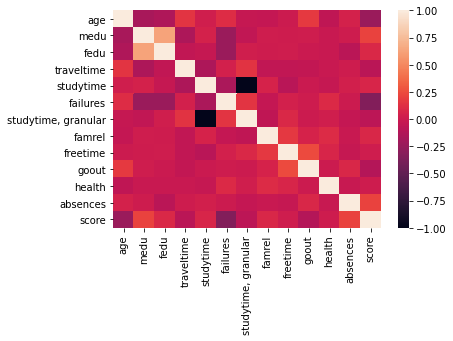

In [18]:
sns.heatmap(students.corr())

Видно, что колонки 'studytime' и 'studytime, granular' обратно зависимы, удалим колонку с отрицательными значениями.
Выберем наиболее коррелирующие колонки с результатом, это: 'age', 'medu', 'failures', 'absences'.

In [19]:
students.drop('studytime, granular', axis = 1, inplace = True)
students

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MS,M,19,R,GT3,T,1.0,1.0,other,services,other,mother,2.0,1.0,1.0,no,no,no,no,NaN,yes,no,no,4.0,3.0,2.0,5.0,0.0,0.0
385,MS,F,18,R,GT3,T,2.0,2.0,at_home,other,other,NaN,NaN,3.0,0.0,no,no,yes,no,yes,yes,NaN,no,5.0,3.0,3.0,4.0,2.0,50.0
387,MS,F,19,R,GT3,T,2.0,3.0,services,other,course,mother,1.0,3.0,1.0,no,no,no,yes,no,yes,yes,no,5.0,4.0,2.0,5.0,0.0,0.0
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0


Проанализируем номинативные переменные

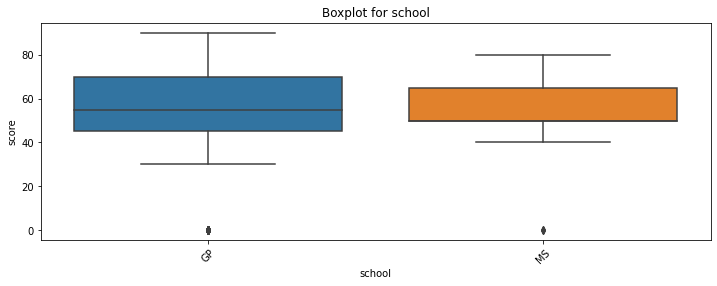

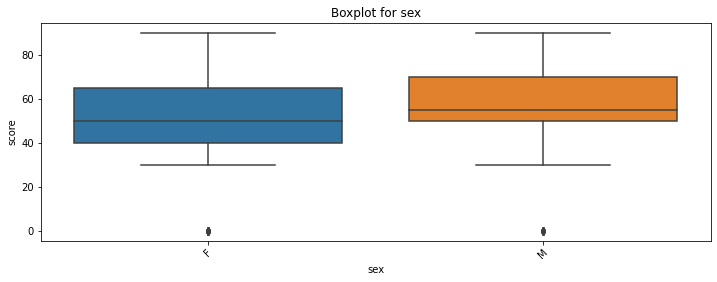

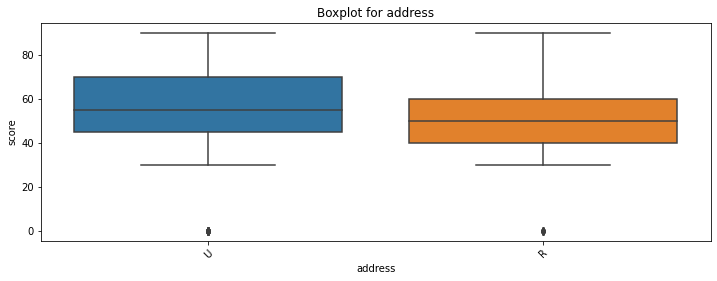

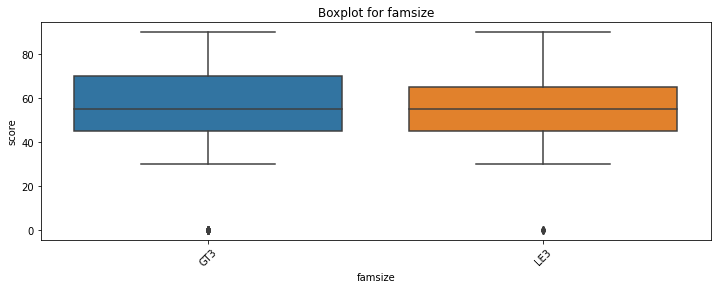

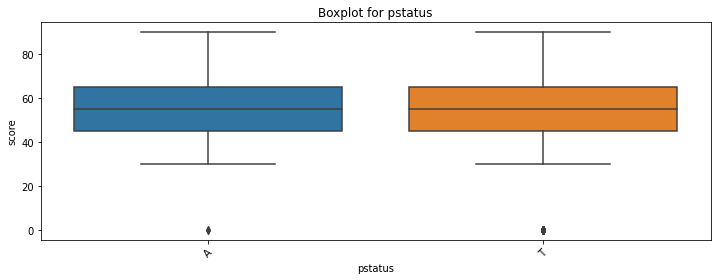

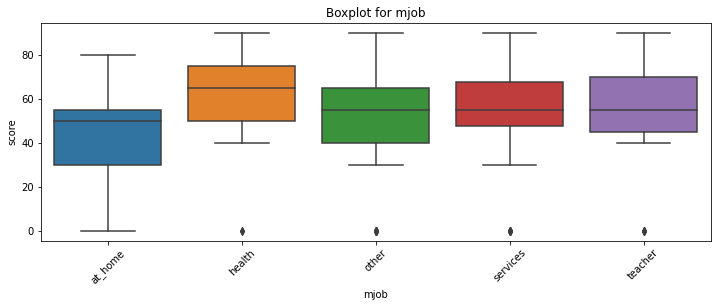

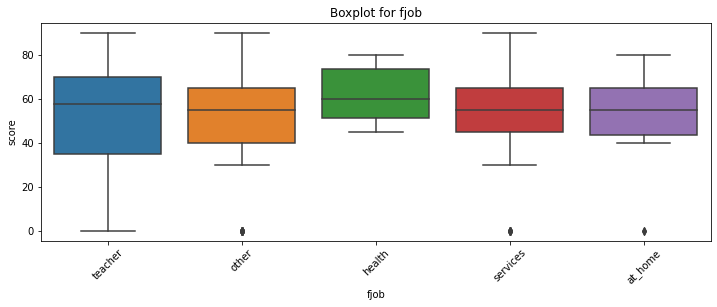

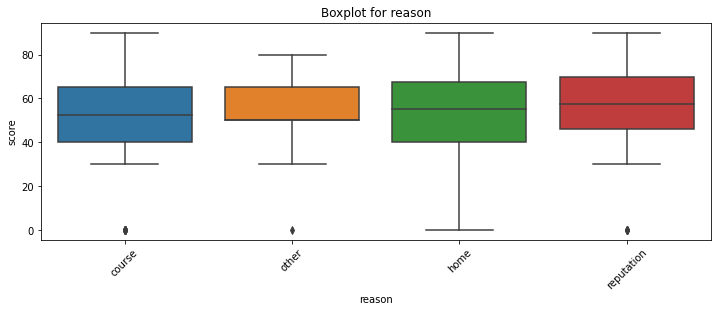

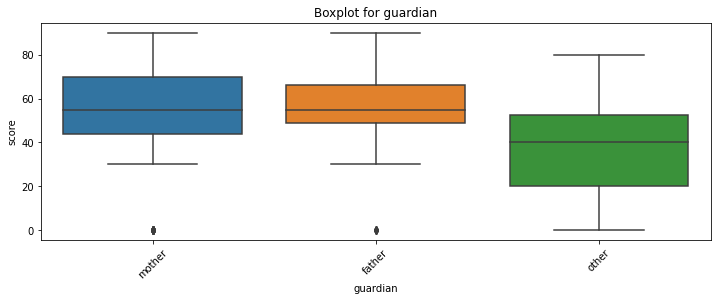

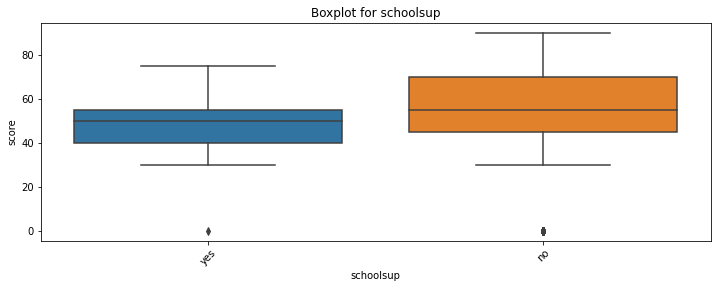

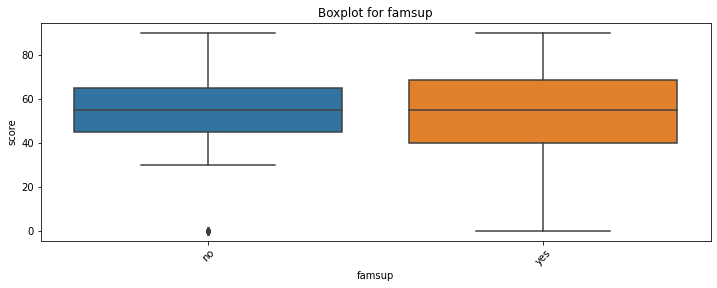

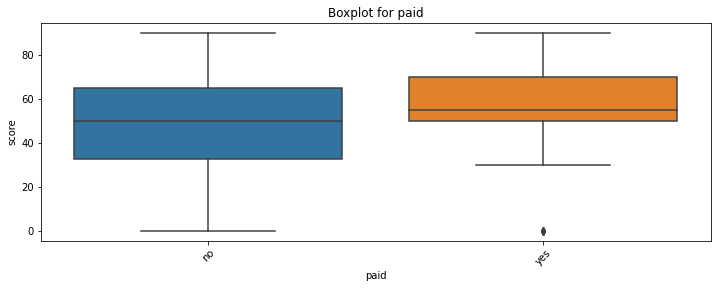

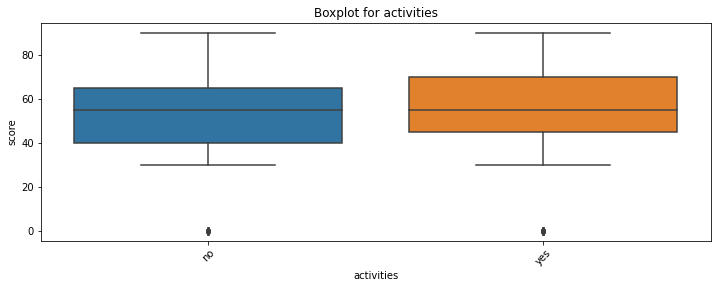

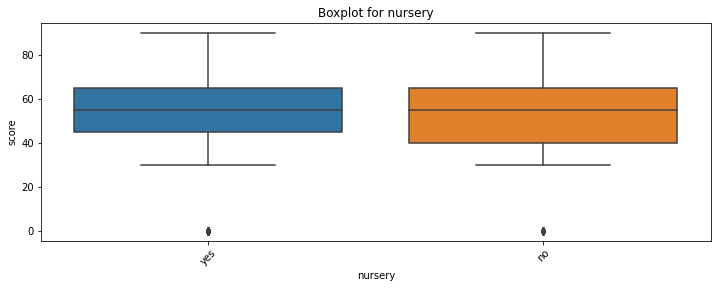

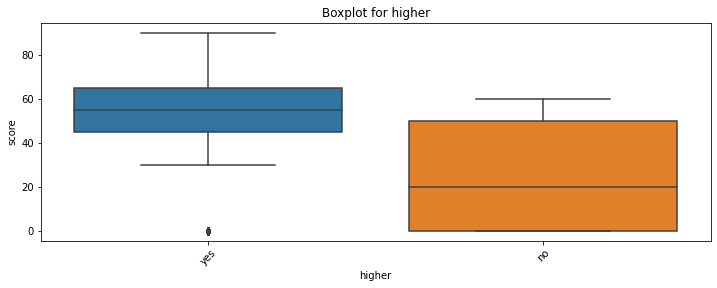

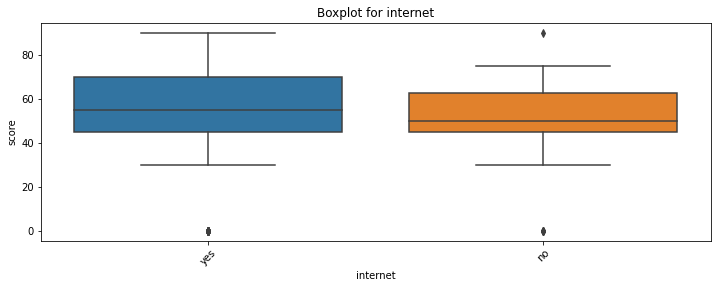

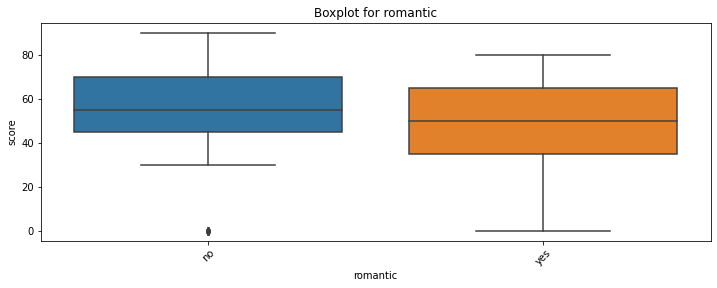

In [20]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Используем тест Стьюдента

In [21]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


# В результате анализа имеем:

In [22]:
students_for_model = students.loc[:, ['age', 'medu', 'failures', 'absences','paid', 'higher', 'romantic']]
students_for_model.head()

,age,medu,failures,absences,paid,higher,romantic
0,18,4.0,0.0,6.0,no,yes,no
1,17,1.0,0.0,4.0,no,yes,no
2,15,1.0,3.0,10.0,NaN,yes,NaN
3,15,4.0,0.0,2.0,yes,yes,yes
4,16,3.0,0.0,4.0,yes,yes,no
